In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import warnings
import numpy as np

warnings.filterwarnings('ignore')

In [2]:
cat = cv2.imread(r'E:/python/data/opencv/image1/cat3.jpg')
cat.shape

(700, 700, 3)

In [8]:
cv2.imshow('cat',cat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
cv2.imshow('cat1',cat[200:400,200:400])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
cv2.imshow('B', cat[:,:,0])
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('G', cat[:,:,1])
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('R', cat[:,:,2])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
b,g,r = cv2.split(cat)
cv2.imshow('B', b)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('G', g)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('R', r)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
cat_copy = cat.copy()
cat_copy[:,:,2] = 0
cat_copy[:,:,0] = 0

cv2.imshow('B', cat_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
cat1 = cv2.imread(r'E:/python/data/opencv/image1/cat2.jpg')
cat1.resize((700,700,3))
cat1

array([[[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [235, 235, 235]],

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236]],

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [25]:
cat12 = cv2.add(cat,cat1)
cv2.imshow('cat', cat12)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
res = cv2.resize(cat,(0,0),fx=3,fy=3)
cv2.imshow('cat', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

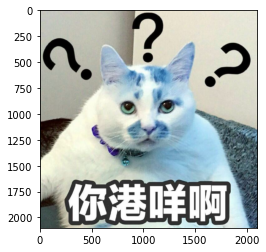

In [39]:
%matplotlib inline
plt.imshow(res)
plt.show()

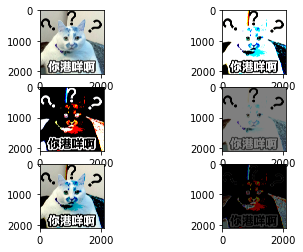

In [43]:
ret, thresh1 = cv2.threshold(res,127,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(res,127,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(res,127,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(res,127,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(res,127,255,cv2.THRESH_TOZERO_INV)
images = [res, thresh1,thresh2,thresh3,thresh4,thresh5]
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i])


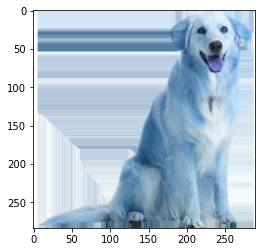

In [3]:
dog = cv2.imread('E:/python/data/opencv/image1/dog.png')
plt.imshow(dog)

In [2]:
def show(img):
    img = img.copy()
    if len(img.shape) == 3:
        b,g,r = cv2.split(img)
        img[:,:,0] = r
        img[:,:,2] = b
    plt.imshow(img,cmap='gray')
dog_blur = cv2.blur(dog, (3,3))
plt.subplot(2,2,1)
show(dog)
plt.subplot(2,2,2)
show(dog_blur)

NameError: name 'dog' is not defined

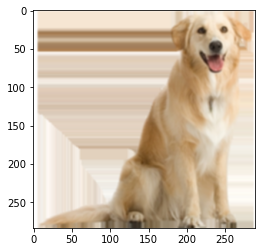

In [71]:
show(cv2.boxFilter(dog,-1, (3,3), normalize=True))

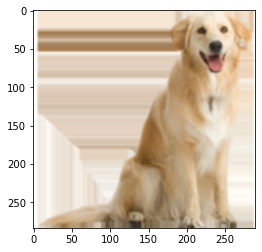

In [73]:
show(cv2.GaussianBlur(dog,(5,5),1))

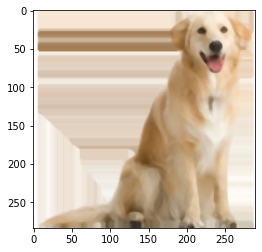

In [74]:
show(cv2.medianBlur(dog,5))

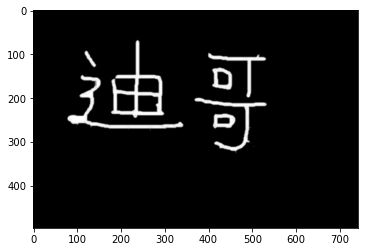

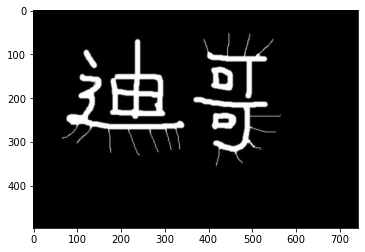

In [78]:
font = cv2.imread('E:/python/data/opencv/image1/font.jpg')
show(cv2.erode(font,np.ones((5,5),np.uint8),iterations=1))
plt.show()
show(font)

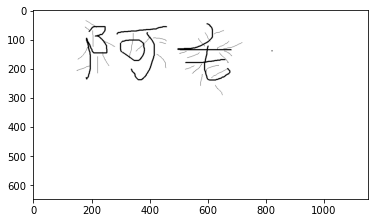

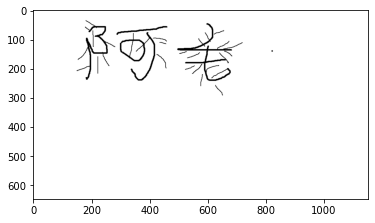

In [89]:
amao = cv2.imread('E:/python/data/opencv/image1/amao.png')
show(amao)
plt.show()
show(cv2.erode(amao,np.ones((2,2),np.uint8),iterations=1))

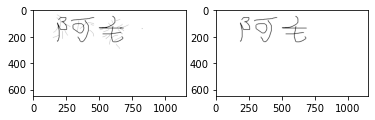

In [91]:
opening = cv2.morphologyEx(amao, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
closing = cv2.morphologyEx(amao, cv2.MORPH_CLOSE, np.ones((3,3),np.uint8))
plt.subplot(2,2,1)
show(opening)
plt.subplot(222)
show(closing)

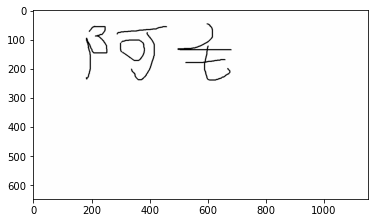

In [96]:
show(opening + closing)

In [9]:
sobelx = np.abs(cv2.Sobel(dog,cv2.CV_64F,1,0,ksize=3))
sobely = np.abs(cv2.Sobel(dog,cv2.CV_64F, 0 ,1, ksize=3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


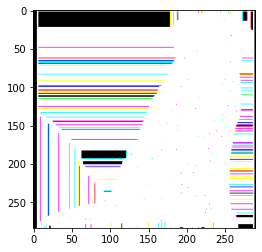

In [10]:
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
show(sobelxy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


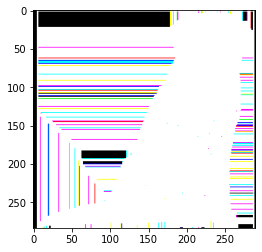

In [11]:
scharrx = np.abs(cv2.Scharr(dog,cv2.CV_64F,1,0))
scharry = np.abs(cv2.Scharr(dog,cv2.CV_64F,0,1))
show(cv2.addWeighted(scharrx,0.5,scharry,0.5,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


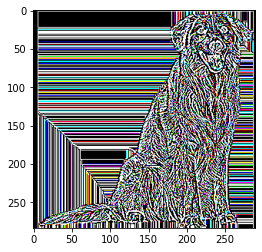

In [12]:
laplacian = cv2.Laplacian(dog,cv2.CV_64F)
show(laplacian)

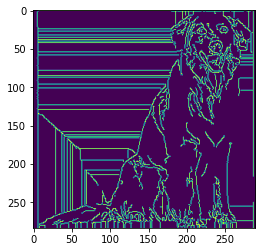

In [13]:
show(cv2.Canny(dog,60,150))

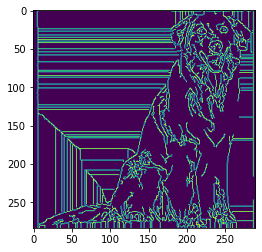

In [14]:
show(cv2.Canny(dog,40,150))

In [23]:
gray = cv2.cvtColor(dog,cv2.COLOR_BGR2GRAY)

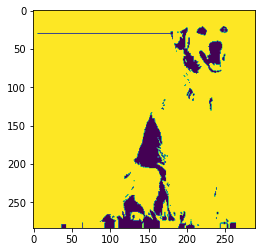

In [25]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
show(thresh)

In [33]:
counters, hierarchy = cv2.findContours(image = thresh,mode = cv2.RETR_TREE,method = 1)

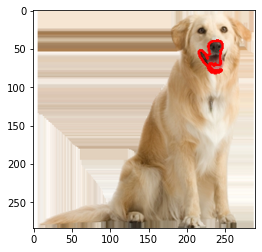

In [43]:
res = cv2.drawContours(dog.copy(), counters,73,(0,0,255),2)
show(res)

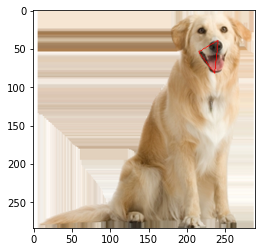

In [50]:
epsilon = 0.08*cv2.arcLength(counters[73], True)
approx = cv2.approxPolyDP(counters[73], epsilon, True)

res = cv2.drawContours(dog.copy(),[approx], -1, (0,0,255),1)
show(res)

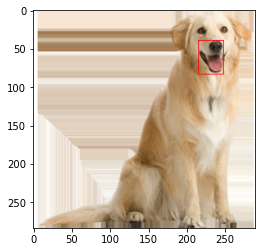

In [51]:
x,y,w,h = cv2.boundingRect(counters[73])
res = cv2.rectangle(dog.copy(),(x,y),(x+w,y+h),(0,0,255),1)
show(res)

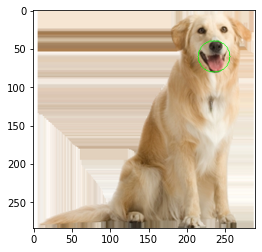

In [53]:
(x,y),radius = cv2.minEnclosingCircle(counters[73])
center = (int(x),int(y))
radius = int(radius)
res = cv2.circle(dog.copy(),center,radius,(0,255,0),1)
show(res)

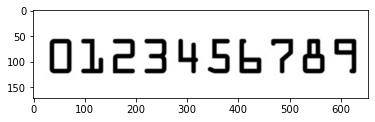

In [70]:
template2 = cv2.imread(r'E:\python\data\opencv\image1\num.png')
show(template2)

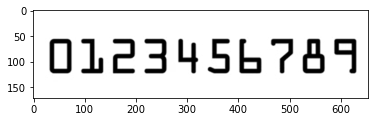

In [63]:
template = cv2.cvtColor(template2,cv2.COLOR_BGR2GRAY)
show(template)

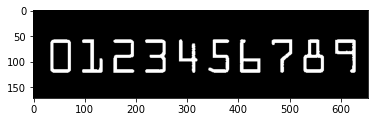

In [64]:
template = cv2.threshold(template, 10, 255, cv2.THRESH_BINARY_INV)[1]
show(template)

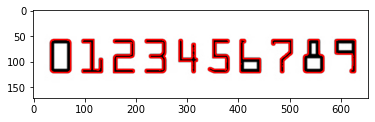

In [103]:
counters, hierarchy = cv2.findContours(template.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
counters.reverse()
temp = cv2.drawContours(template2.copy(),counters,-1,(0,0,255),2)
show(temp)

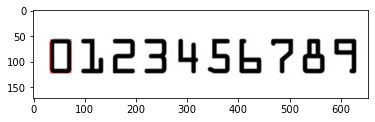

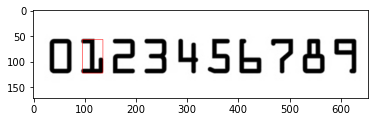

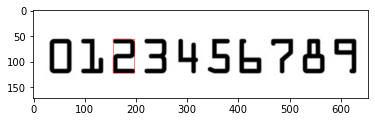

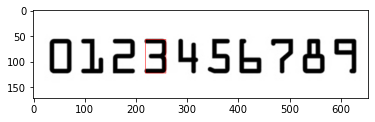

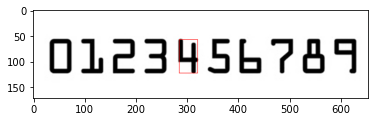

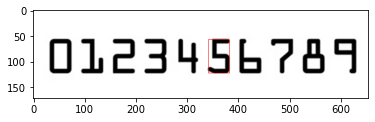

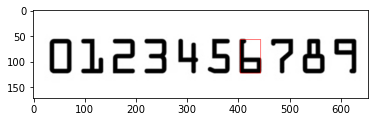

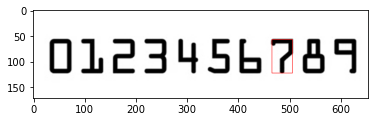

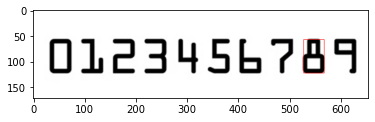

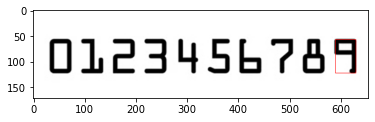

In [106]:
digits = {}
for (i, c) in enumerate(counters):
    (x ,y, w, h) = cv2.boundingRect(c)
    res = cv2.rectangle(template2.copy(),(x,y),(x+w,y+h),(0,0,255),1)
    roi = template[y:y+h,x:x+h]
    roi = cv2.resize(roi,(57,88))
    digits[i] = roi
    show(res)
    plt.show()

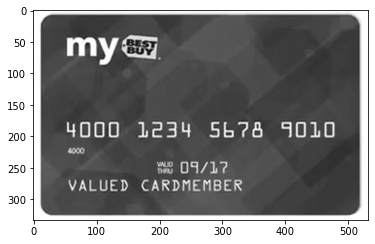

In [111]:
card = cv2.imread(r'E:\python\data\opencv\image1\card.png')
card_gray = cv2.cvtColor(card,cv2.COLOR_BGR2GRAY)
show(card_gray)

In [110]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT,(9,3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

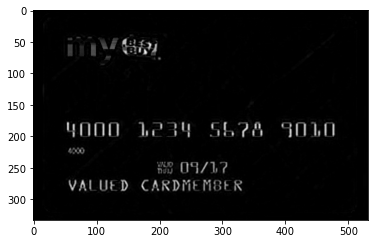

In [113]:
tomhat = cv2.morphologyEx(card_gray, cv2.MORPH_TOPHAT, rectKernel)
show(tomhat)

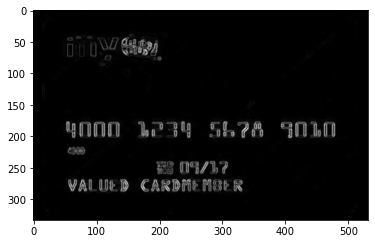

In [135]:
gradX = cv2.Sobel(tomhat, ddepth=cv2.CV_32F,dx=1,dy=0,ksize=-1)
gradY = cv2.Sobel(tomhat, ddepth=cv2.CV_32F,dx=0,dy=1,ksize=-1)
gradX = np.absolute(gradX)
gradY = np.absolute(gradY)
gradX = cv2.addWeighted(gradX,0.5,gradY,0.5,0)
(minVal,maxVal) = (np.min(gradX),np.max(gradX))
gradX = (255 * ((gradX - minVal)/(maxVal-minVal)))
gradX = gradX.astype('uint8')
show(gradX)

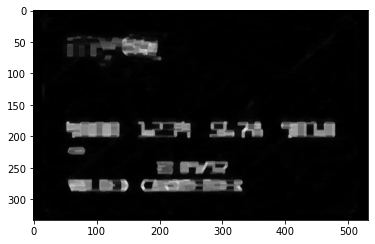

In [195]:
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
show(gradX)

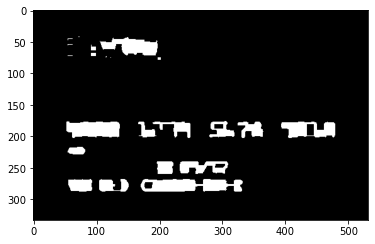

In [196]:
thresh = cv2.threshold(gradX,0 ,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
show(thresh)

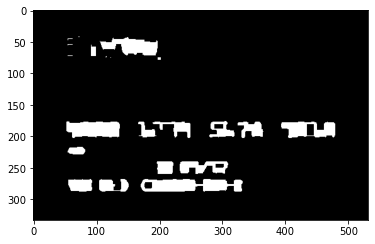

In [197]:
thresh = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,sqKernel)
show(thresh)

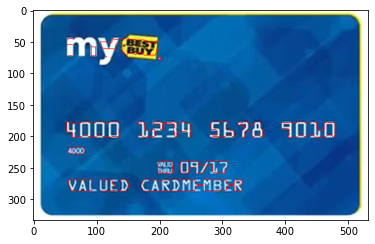

In [198]:
counters2, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
res = cv2.drawContours(card.copy(),counters2,-1,(0,0,255),1)
show(res)

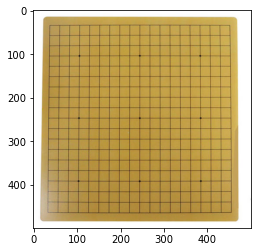

In [21]:
chess = cv2.imread('E:/python/data/opencv/image1/chess2.jpg')
show(chess)


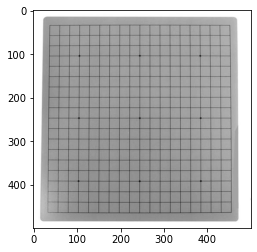

In [22]:
gray_chess = cv2.cvtColor(chess,cv2.COLOR_BGR2GRAY)
show(gray_chess)

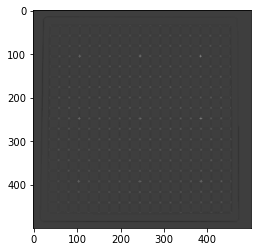

In [23]:
dst = cv2.cornerHarris(gray_chess,2,3,0.04)
show(dst)

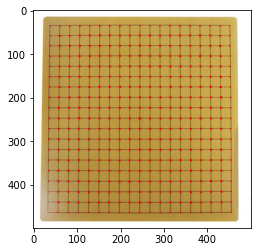

In [27]:
chess[dst>0.01*dst.max()] = [0,0,255]
show(chess)

In [25]:
gray_chess

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)